## Colab Installations if Needed

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Master Thesis/DeepRL
!ls -l
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Master Thesis/DeepRL
total 1582
drwx------ 3 root root   4096 Nov 12 15:35  agents
-rw------- 1 root root 310510 Nov 13 14:12  DQN_Cartpole.ipynb
-rw------- 1 root root 600361 Nov 13 14:13  DQN_Lunar_Lander.ipynb
drwx------ 3 root root   4096 Nov 12 15:35  DQN_trained_models
drwx------ 3 root root   4096 Nov 12 15:35  helpers
-rw------- 1 root root 302979 Nov 13 17:33  PG_Cartpole.ipynb
-rw------- 1 root root 373636 Nov 13 18:16  PG_Lunar_Lander.ipynb
drwx------ 3 root root   4096 Nov 12 17:20  PG_trained_models
drwx------ 2 root root   4096 Nov 12 15:35  Presentations
-rw------- 1 root root   5852 Nov 12 15:35  README.md
-rw------- 1 root root     88 Nov 12 15:35  requirements.txt
drwx------ 2 root root   4096 Nov 12 16:14 'Thesis Draft'
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit

# Imports 

In [2]:
from agents.PG_Agent import PG_Agent
from helpers.plot_util import *

In [3]:
agent = PG_Agent(
                env_name="LunarLander-v2",
                 ALPHA= 0.00080,
                 GAMMA=0.97,
                 layer1_size=128,  
                 layer2_size=128,
                 reproduce_seed=None)

#Good Settings
'''
ALPHA= 0.00025,
GAMMA=0.99,
layer1_size=128,  
layer2_size=128, 
num_episodes=5000
'''
None

# If you want to first train an agent use this cell ❎

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Ep: 1385 , Ep_Steps: 335 , Ep_Reward : 244.39 , Avg_Reward : 200.50 , Loss: -99.84
Mean Reward over last 100 ep more than 200

 Agent trained.....

 Saving Model info.....

 LunarLander-v2 Problem took 1385 episodes


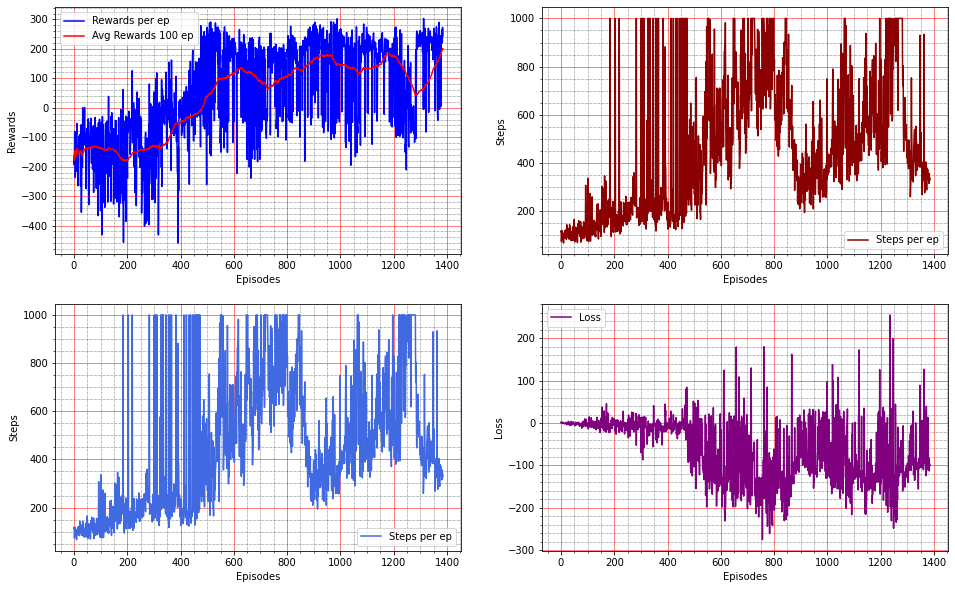

In [4]:
agent.train_multiple_episodes(num_episodes=2000)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
#learning_plot(book_keeping)
PG_learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 222.53437177162925 , Steps 512
Tests # 900 , Rewards 180.7792980547471 , Steps 617
Tests # 930 , Rewards -47.08589708194088 , Steps 613
Tests # 180 , Rewards 101.16741505666282 , Steps 708
Tests # 660 , Rewards 191.70704094024597 , Steps 576
Tests # 240 , Rewards 155.4762566997027 , Steps 575
Tests # 960 , Rewards 251.0058505821257 , Steps 510
Tests # 450 , Rewards -42.82718523035275 , Steps 627
Tests # 30 , Rewards 188.14385373914203 , Steps 549
Tests # 90 , Rewards -57.431703065775714 , Steps 500
Tests # 150 , Rewards 269.2642990399944 , Steps 455
Tests # 210 , Rewards 200.55104316853686 , Steps 505
Tests # 330 , Rewards 202.93703998436928 , Steps 637
Tests # 420 , Rewards 158.1195179954899 , Steps 533
Tests # 510 , Rewards -50.95131906033202 , Steps 582
Tests # 75 , Rewards 194.7364541138483 , Steps 602


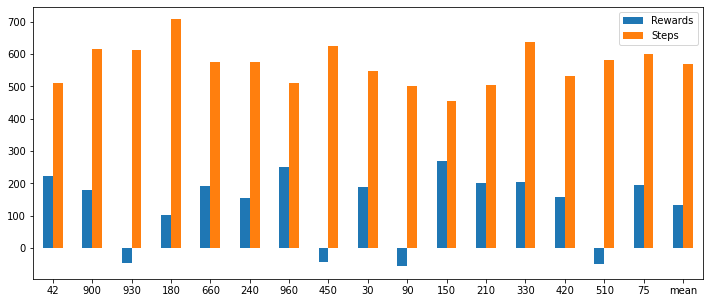

In [5]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

# If you want to use a pretrained model use this cell ❎

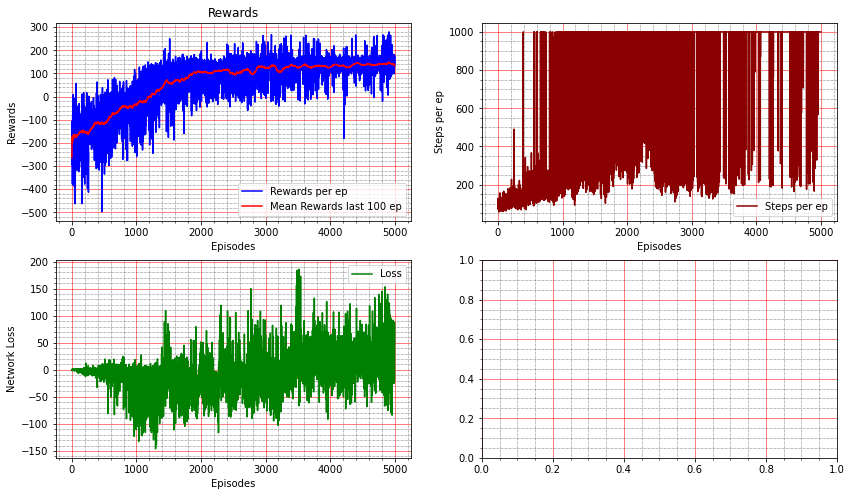

In [ ]:
if not agent.trained:
  # Good Models 
  # not so good models 
  model_suffix="20211108-082804" # some 
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  PG_learning_plot(book_keeping)

### Render the 16 Test Case gif's : ⏩

In [6]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

x=len(test_cases_data)//4
y=len(test_cases_data)//4
grid = GridspecLayout(x, y)

for i in range(x):
    for j in range(y):
        img=open(image_paths[4*i+j],'rb').read()
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x83\x00\x00\x00\x00\x00\xcc\xcc\x0033ff3f3fffff33\x…